In [16]:
## Location Scan of Incr2 Parameter

# 1 - Find the average waveform for each scan step and plot
# 2 - Plot only Even Blocks
# 3 - Plot only Odd Blocks

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

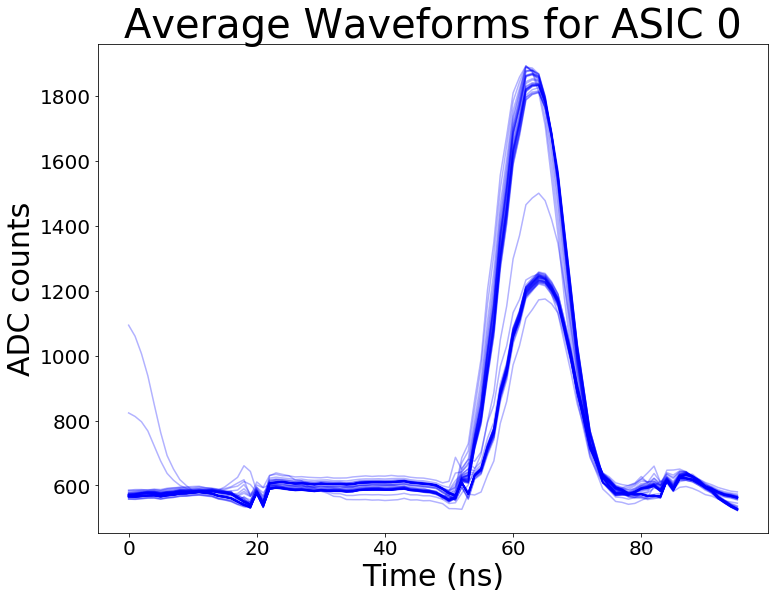

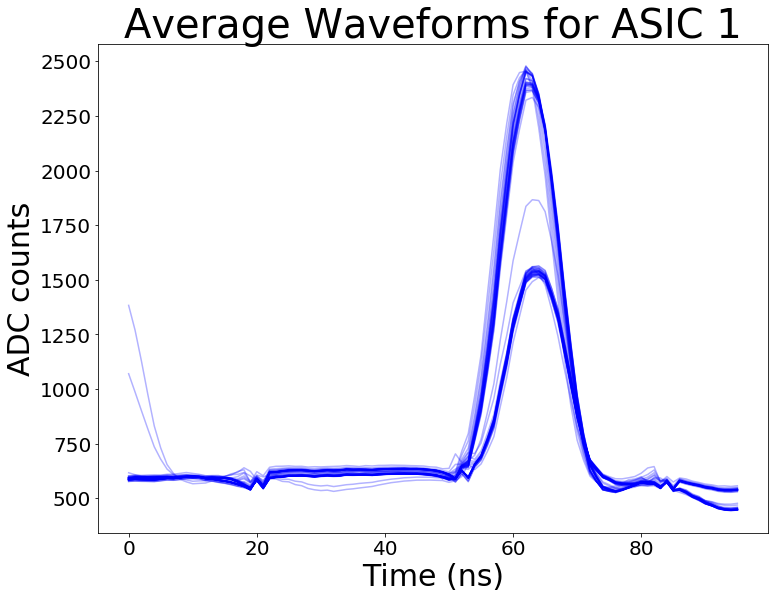

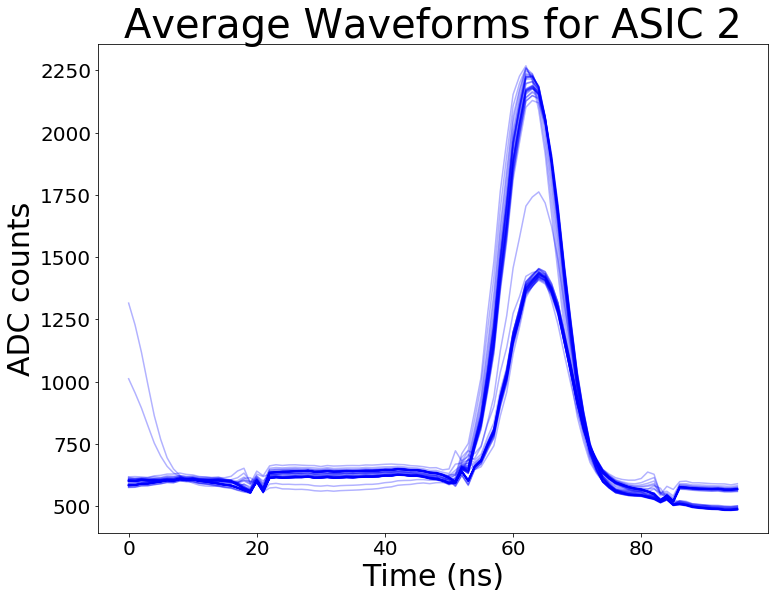

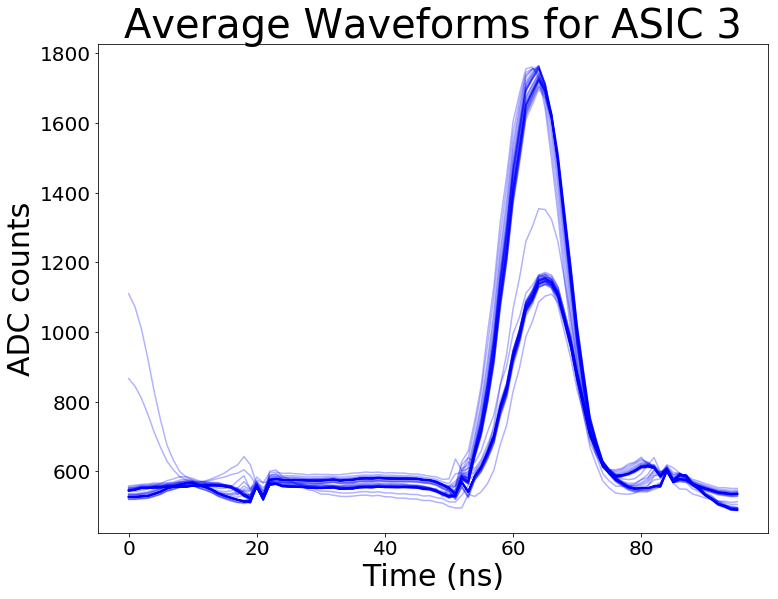

In [3]:
Incr2 = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320688,320752):
        data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr2 Location/sampleFileAllBlocks_run" + str(run) + "ASIC" + str(ASIC) + "CH6.npz", 'r'))
        waveforms = []
        for event in range(len(data['event'])):
            phase = int(data['phase'][event])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            waveforms.append(data['samples'][event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(data['event'])):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    Incr2.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

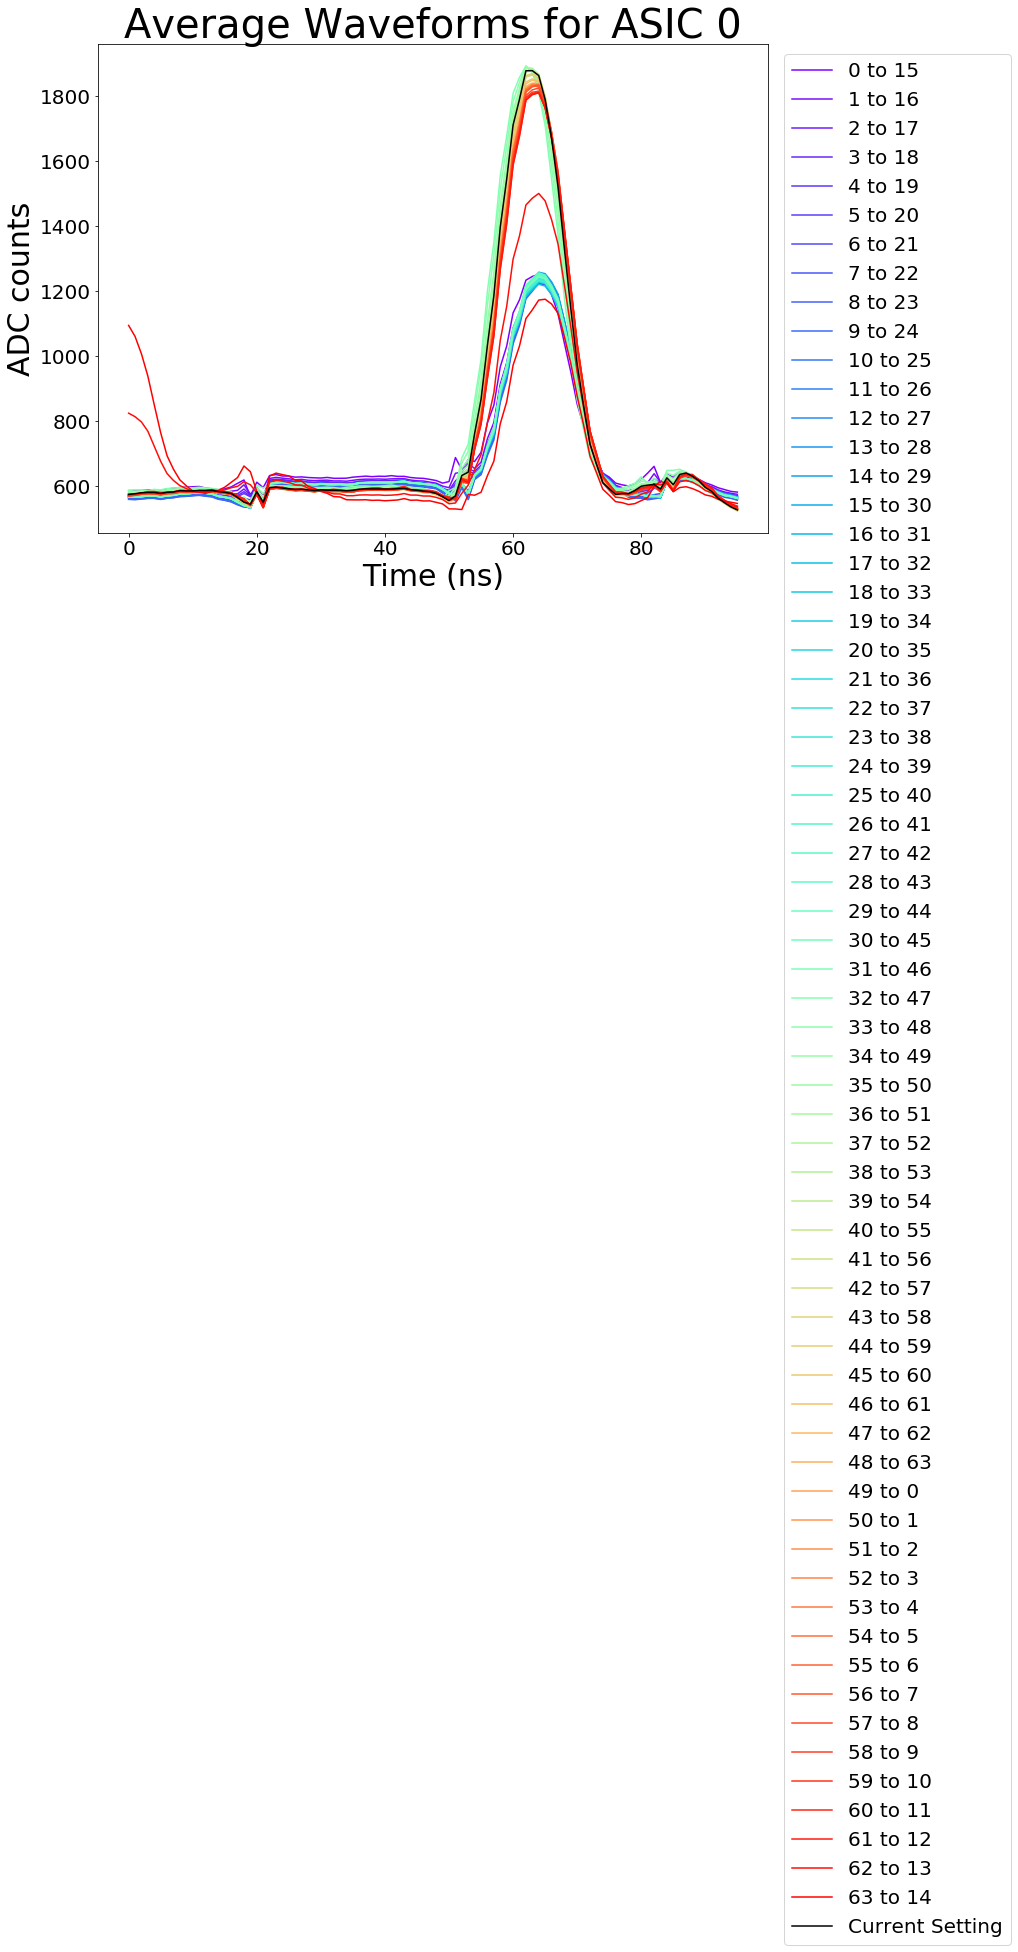

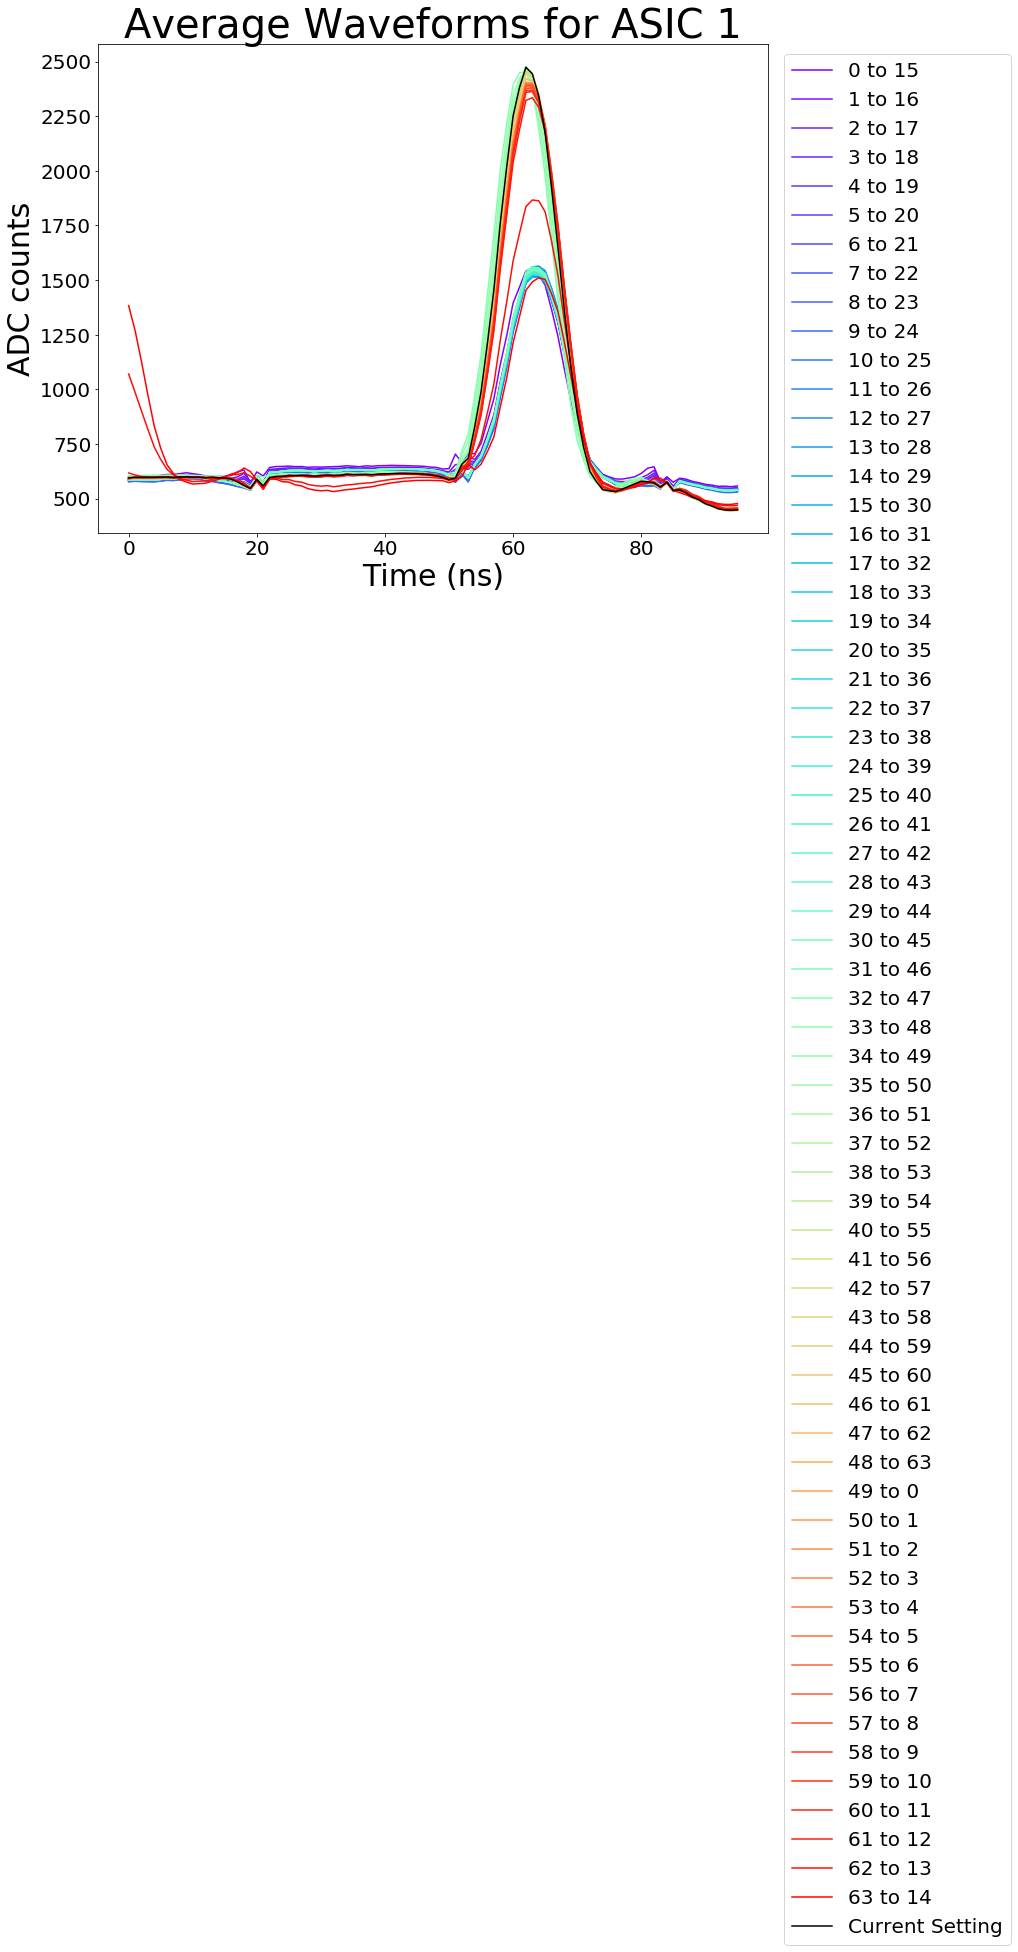

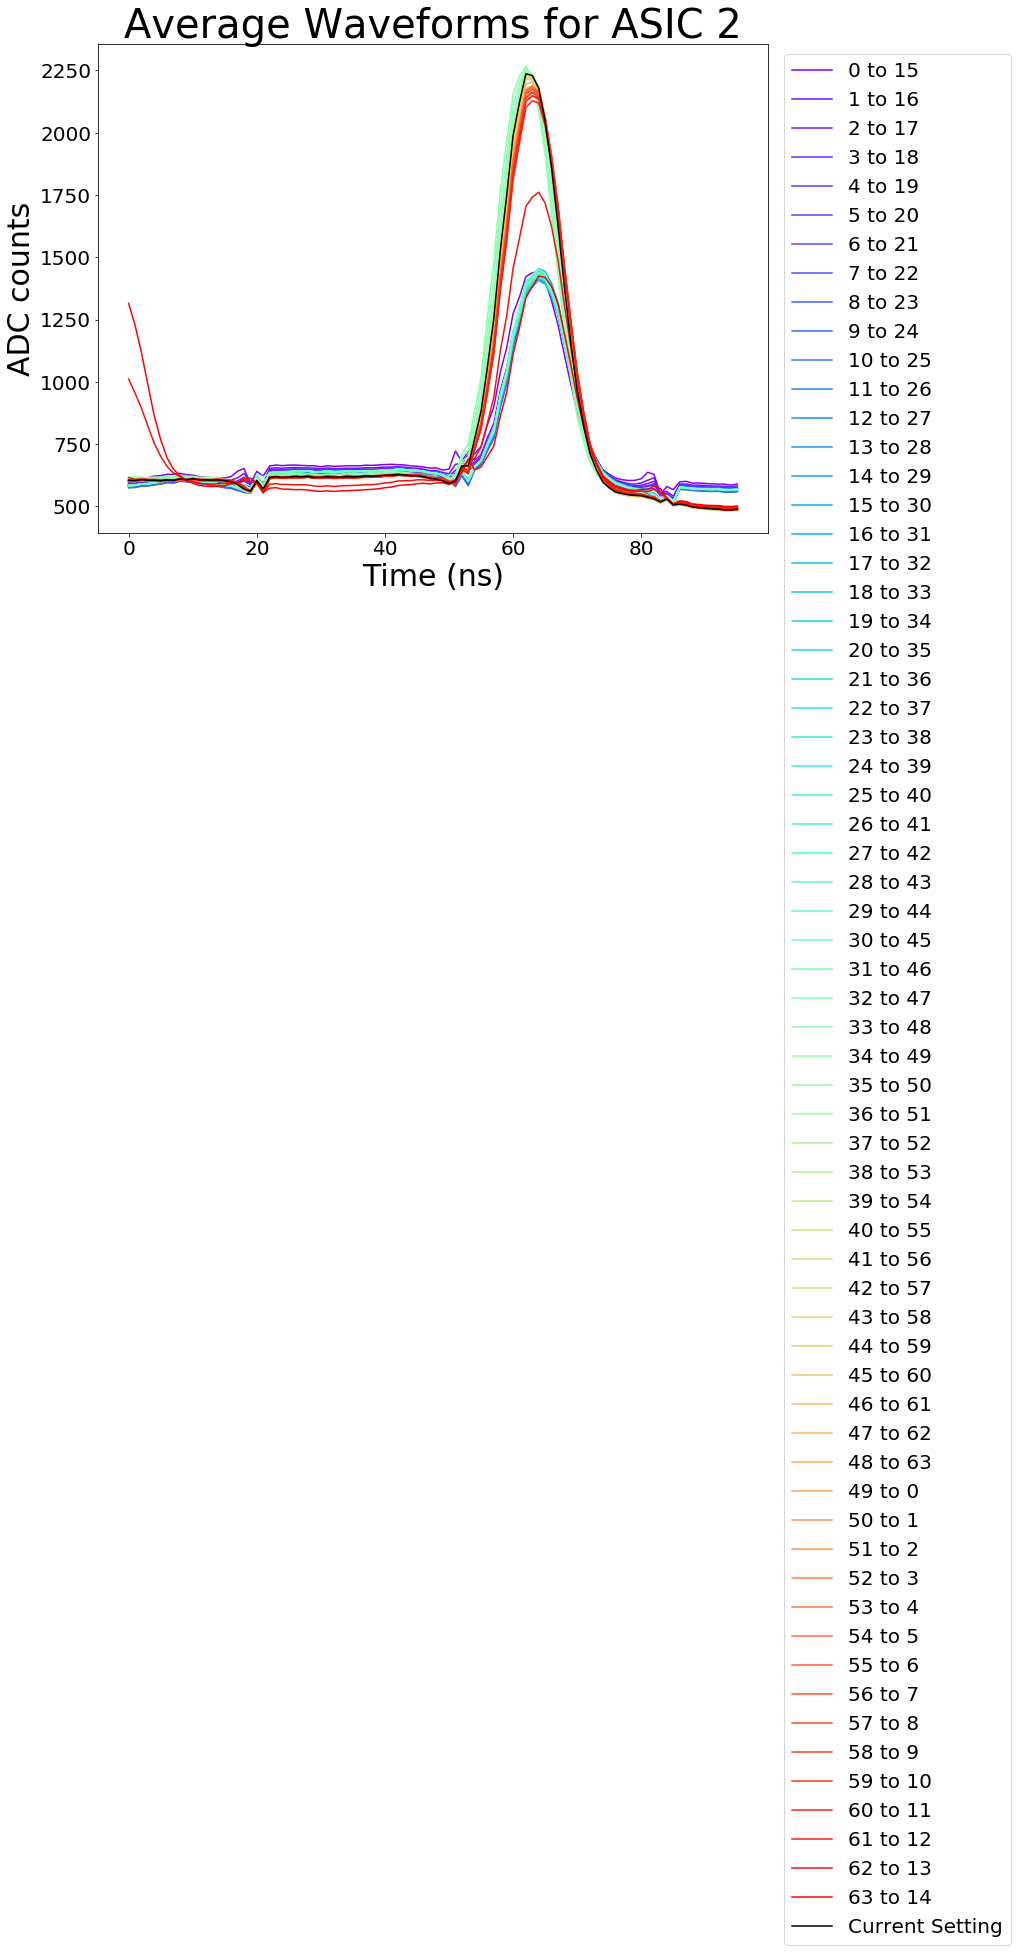

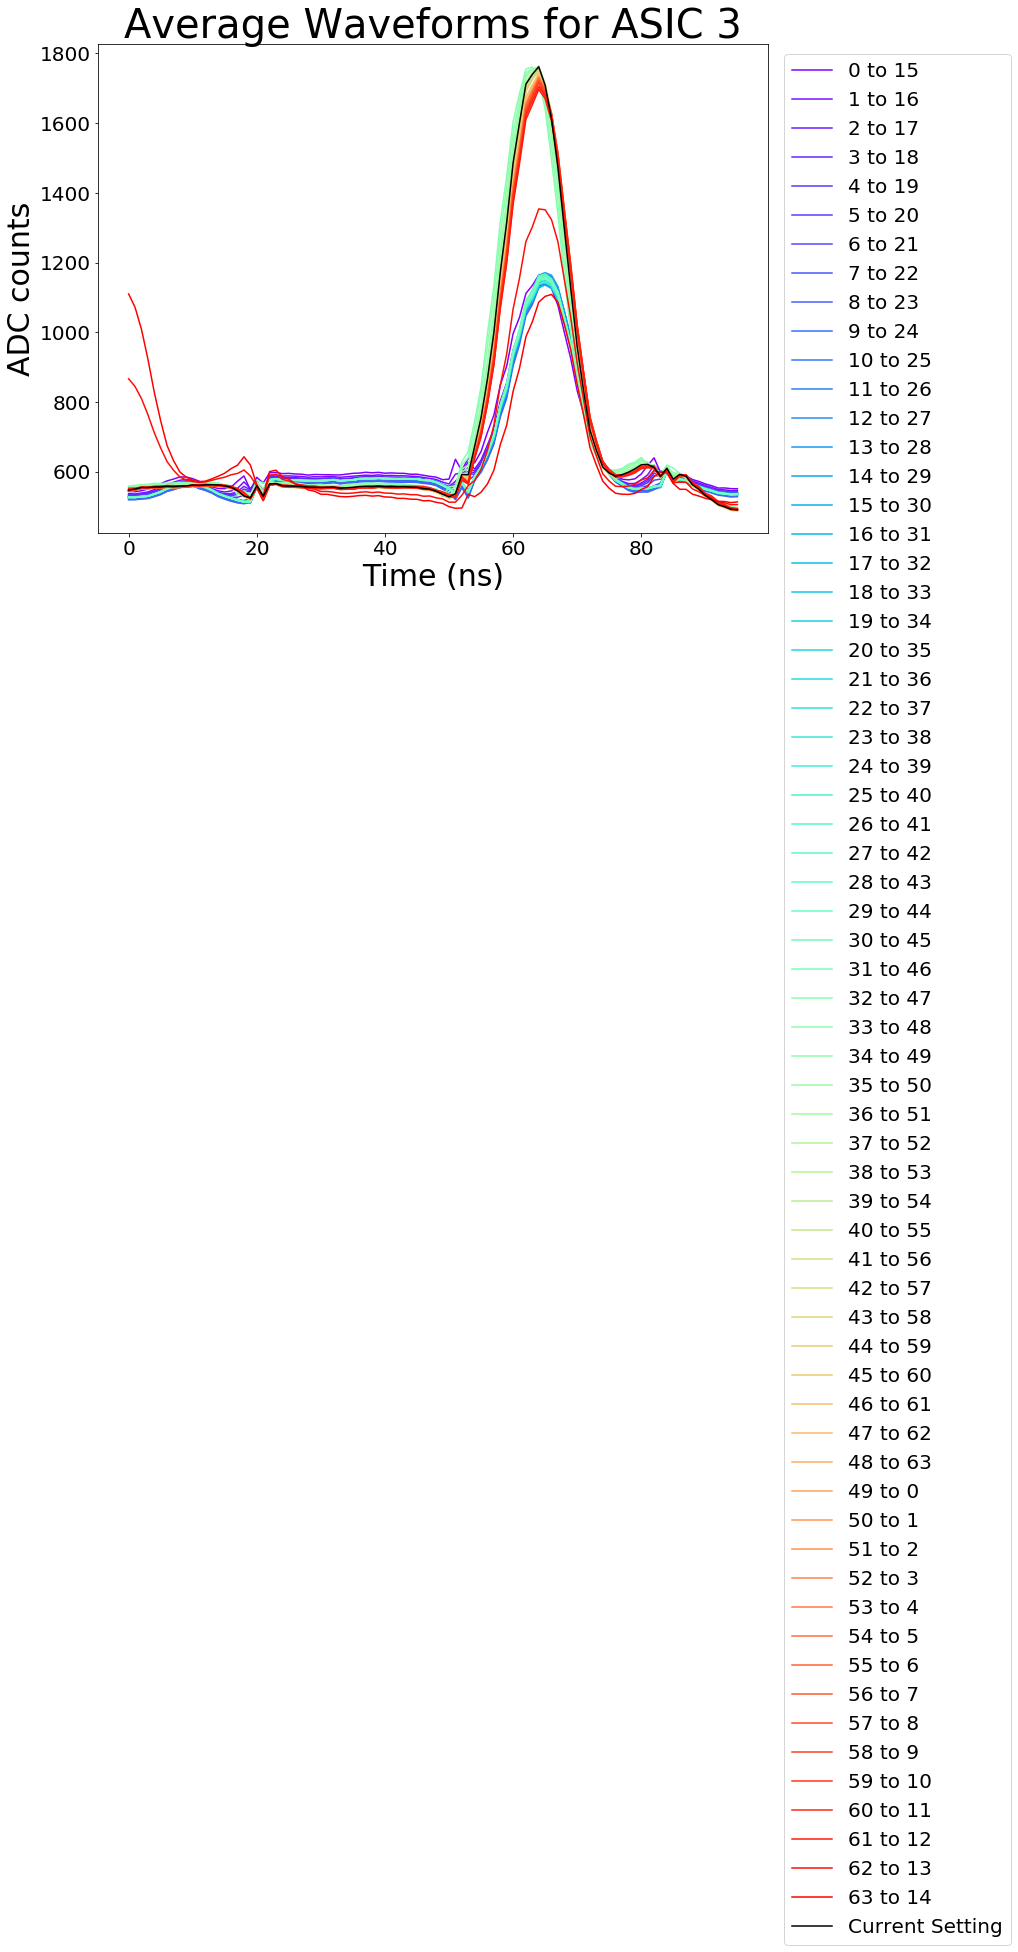

In [5]:
# Plot with rainbow colormap

number_runs = 64
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(number_runs):
        plt.plot(Incr2[ASIC][run], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
        start_value = start_value + 1
    plt.plot(Incr2[ASIC][37], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [7]:
## Even Blocks only ##

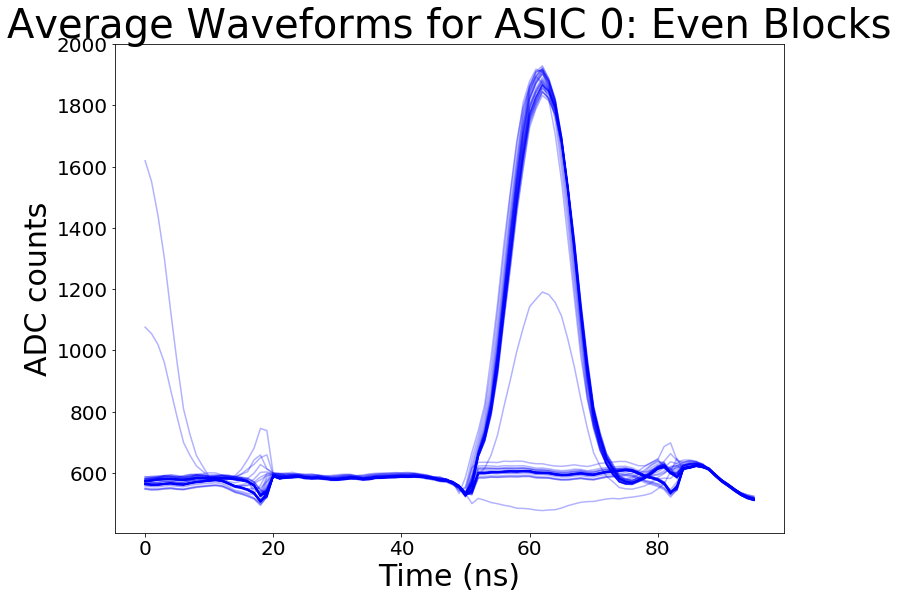

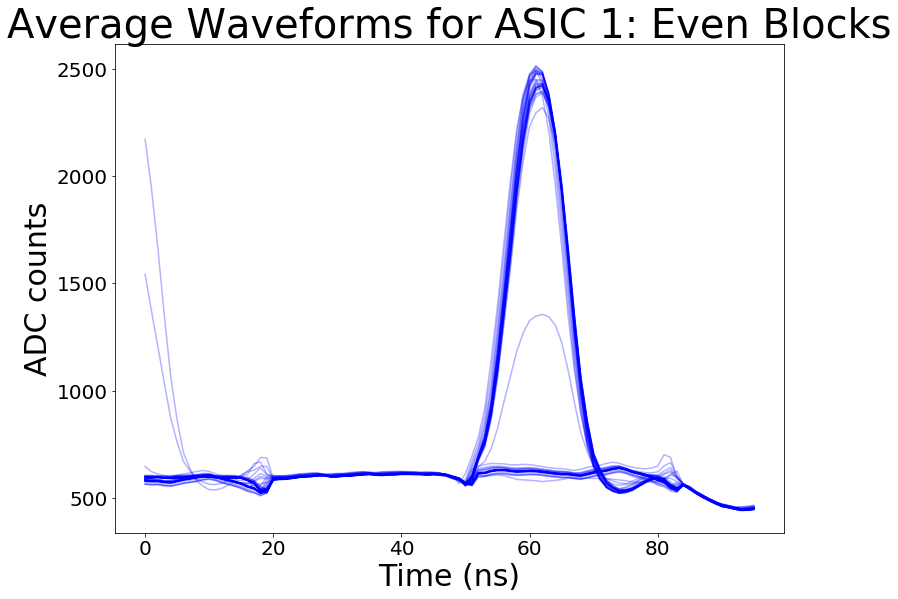

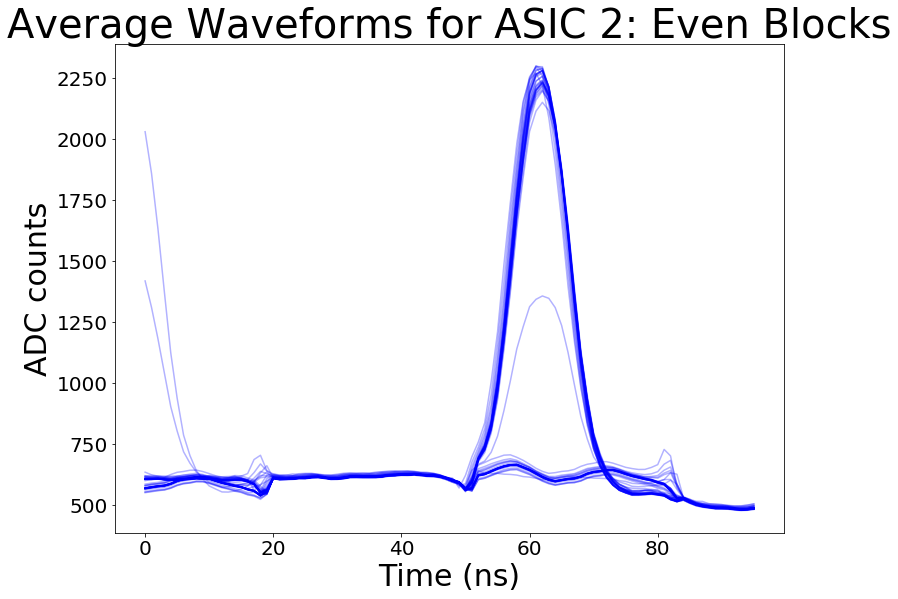

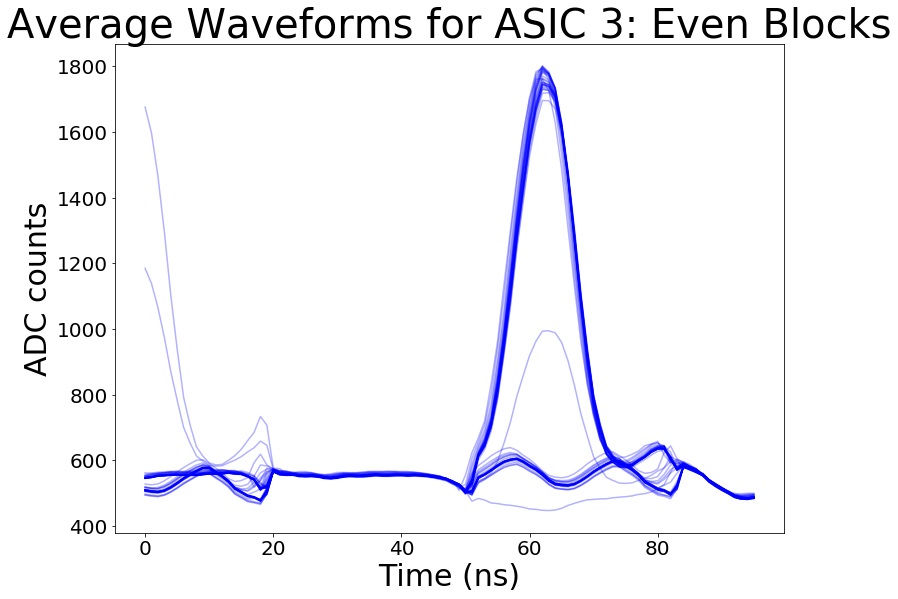

In [4]:
Incr2_even = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320688,320752):
        data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr2 Location/sampleFileAllBlocks_run" + str(run) + "ASIC" + str(ASIC) + "CH6.npz", 'r'))
        waveforms = []
        for event in range(len(data['event'])):
            phase = int(data['phase'][event])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data['block'][event])
            if block%2==0:
                waveforms.append(data['samples'][event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    Incr2_even.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ': Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

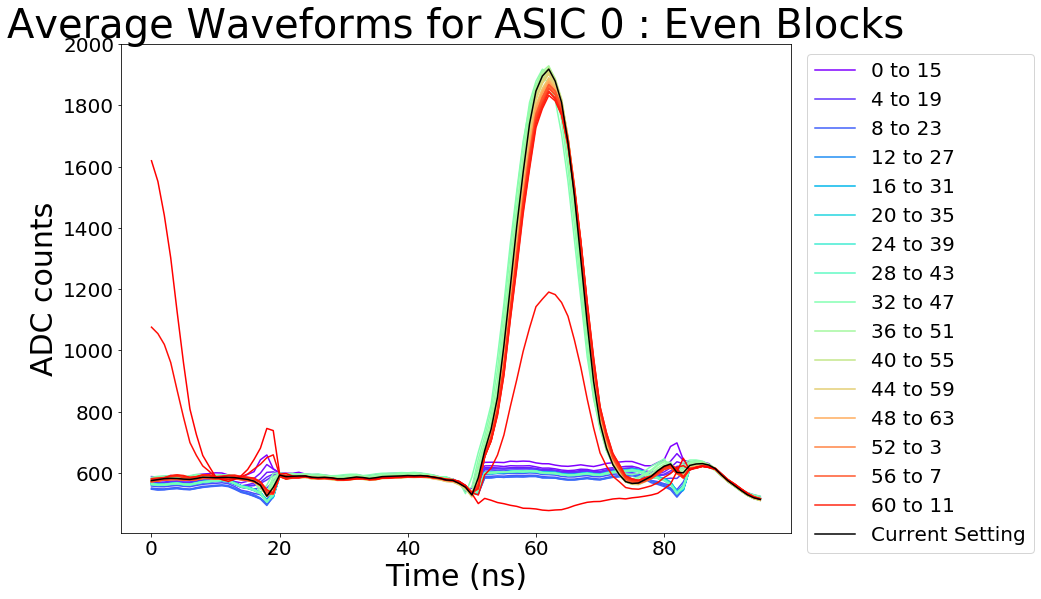

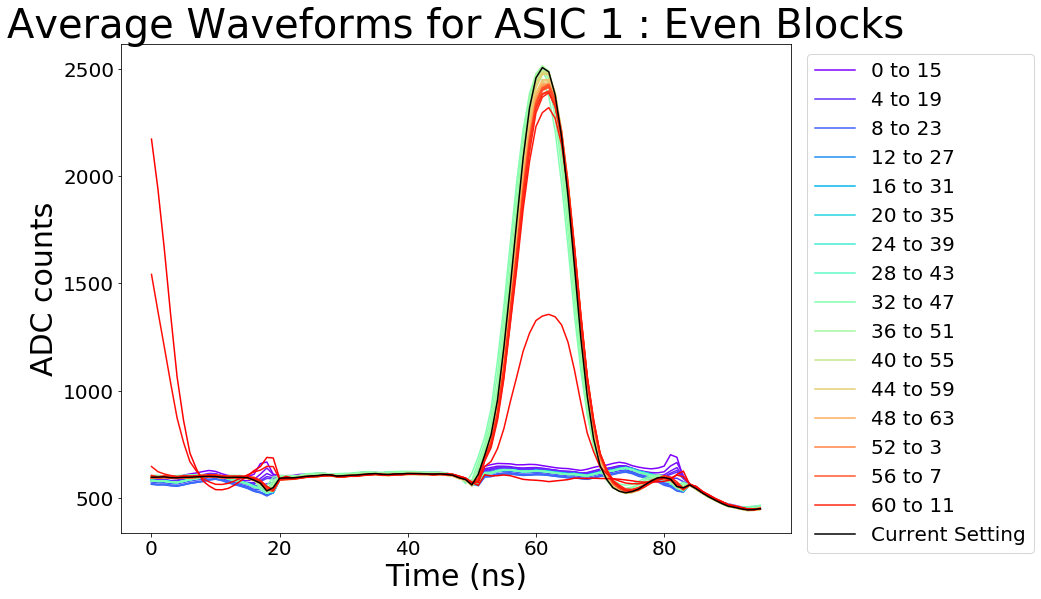

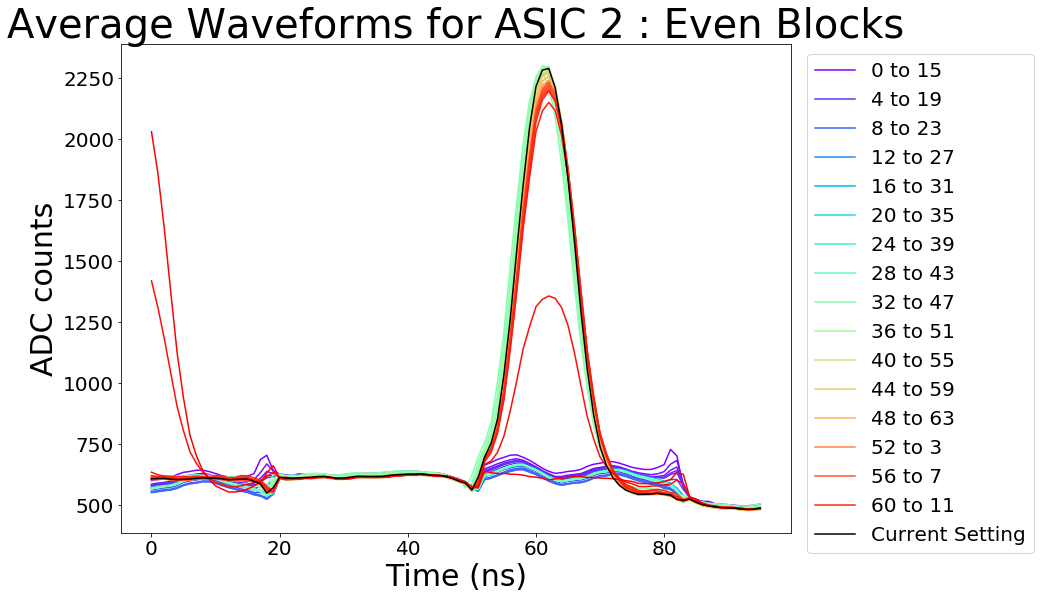

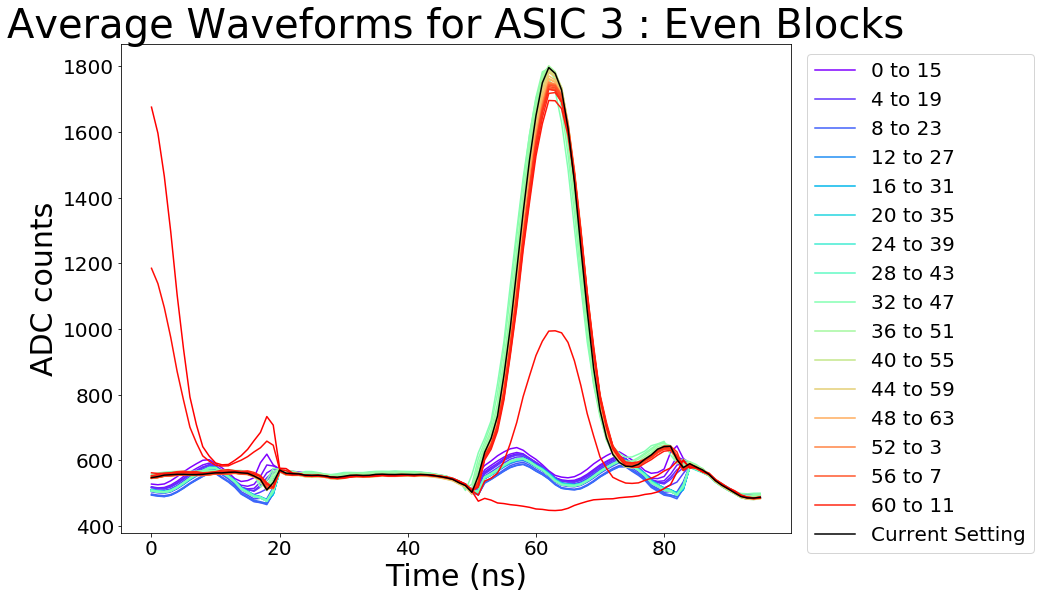

In [7]:
# Plot with rainbow colormap

number_runs = 64
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(number_runs):
        if run%4==0:
            plt.plot(Incr2_even[ASIC][run], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(Incr2_even[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.plot(Incr2_even[ASIC][37], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

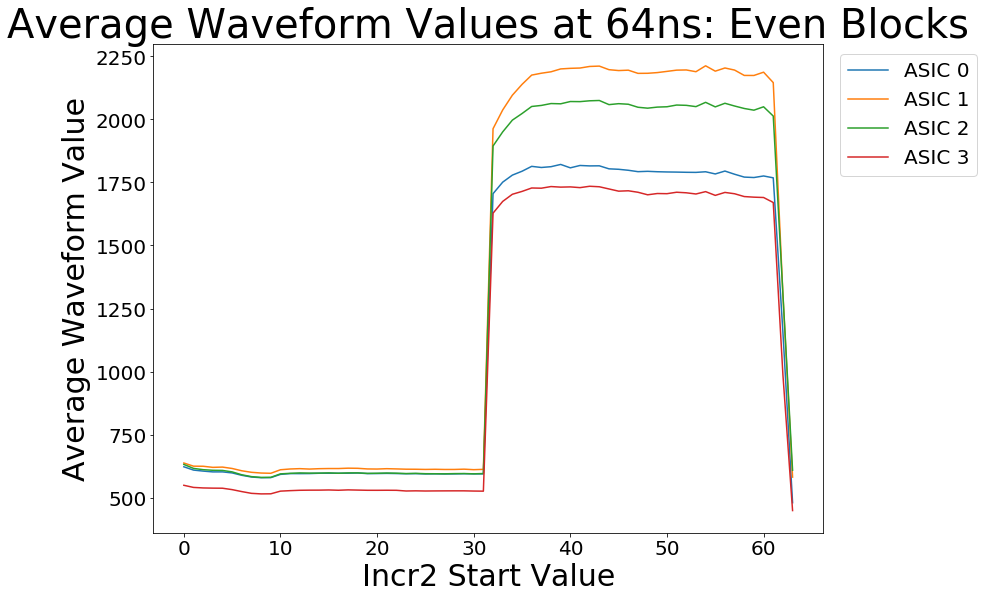

In [19]:
# Compare average waveform values at 64ns

start = [i for i in range(64)]
for ASIC in range(4):
    value = []
    for run in range(64):
        value.append(Incr2_even[ASIC][run][64])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 64ns: Even Blocks')
plt.xlabel('Incr2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [12]:
## Odd Blocks only ##

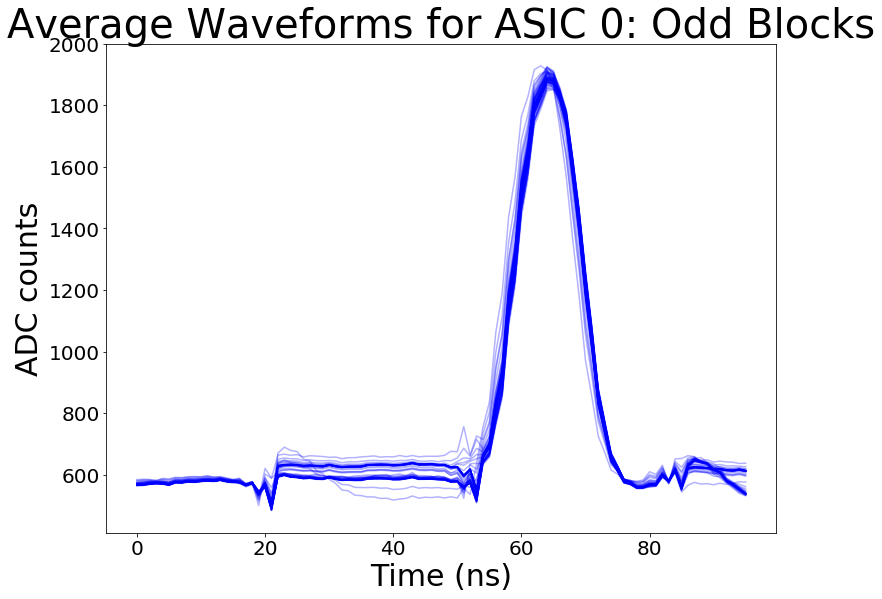

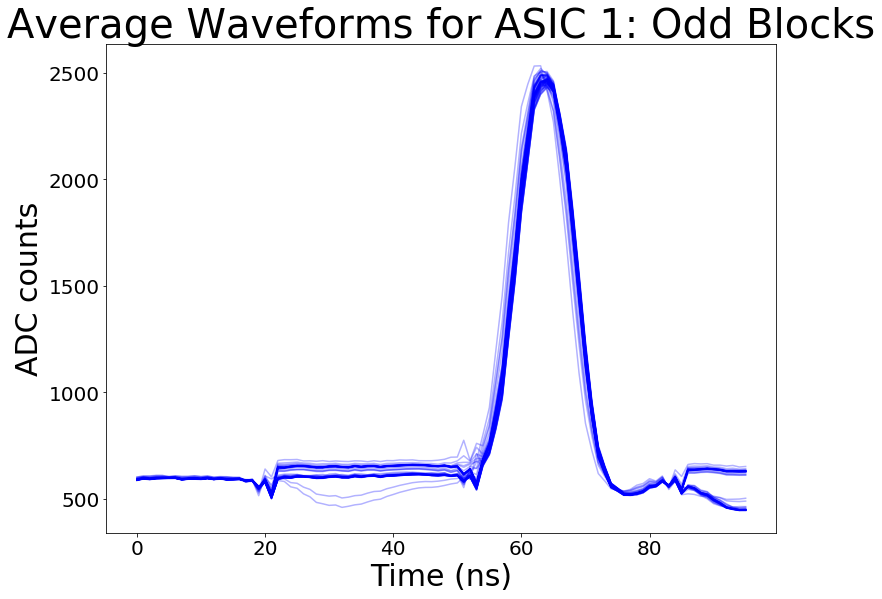

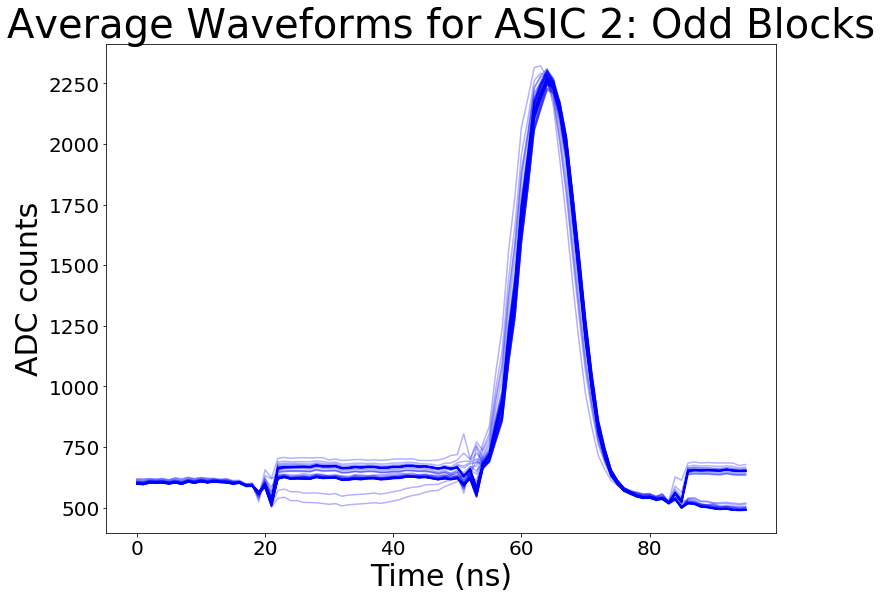

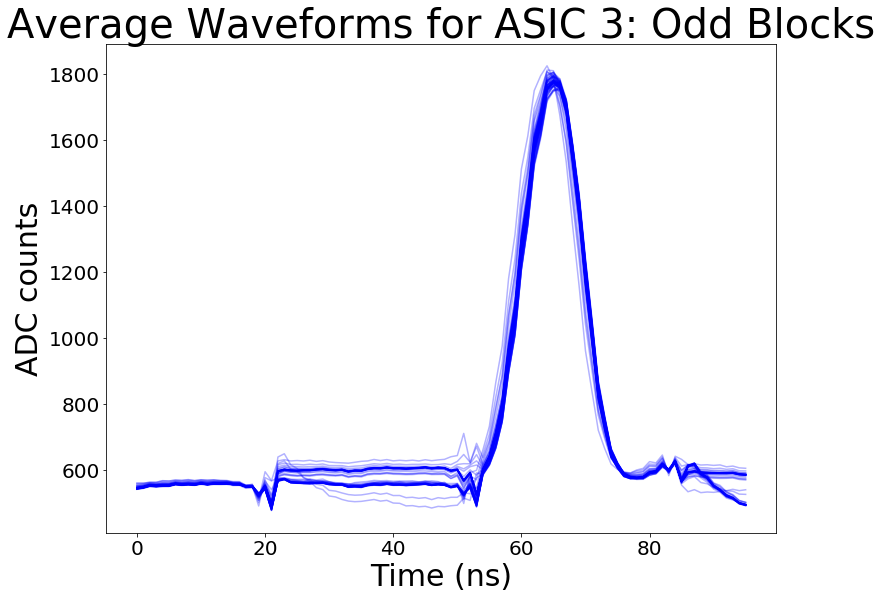

In [6]:
Incr2_odd = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320688,320752):
        data = dict(np.load("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/Incr2 Location/sampleFileAllBlocks_run" + str(run) + "ASIC" + str(ASIC) + "CH6.npz", 'r'))
        waveforms = []
        for event in range(len(data['event'])):
            phase = int(data['phase'][event])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data['block'][event])
            if block%2!=0:
                waveforms.append(data['samples'][event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str((start_value + 15)%64), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    Incr2_odd.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ': Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

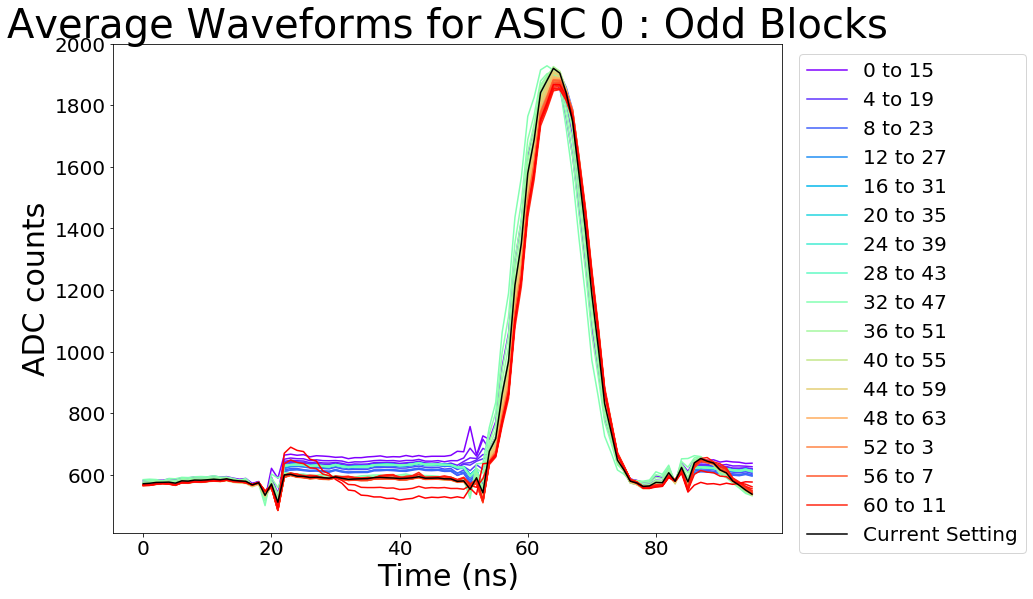

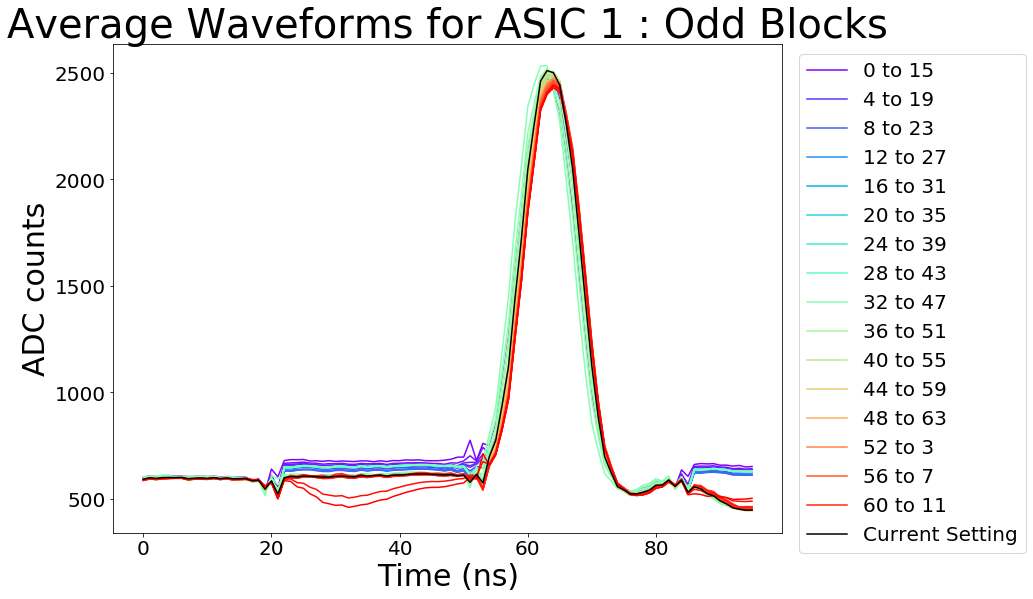

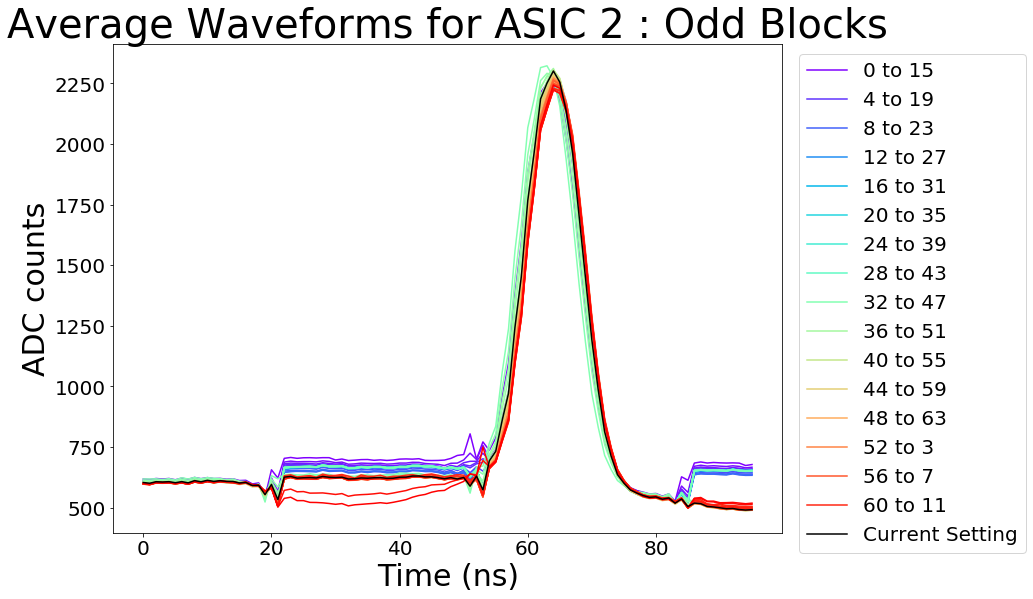

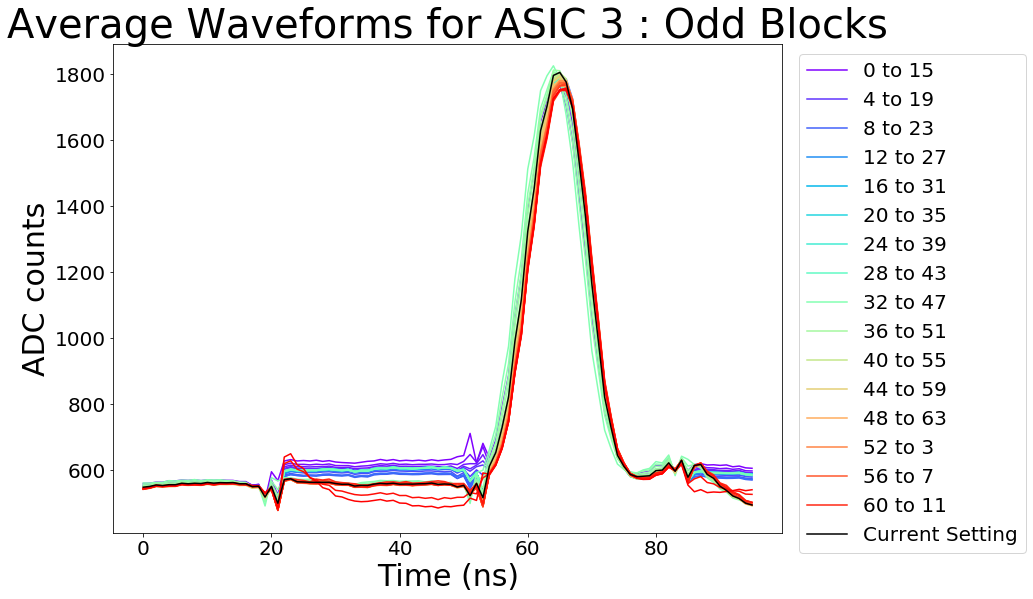

In [8]:
# Plot with rainbow colormap

number_runs = 64
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(number_runs):
        if run%4==0:
            plt.plot(Incr2_odd[ASIC][run], label = str(start_value) + ' to ' + str((start_value + 15)%64), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(Incr2_odd[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.plot(Incr2_odd[ASIC][37], label = 'Current Setting', color = 'black')
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()